# Project Part 1

## Introduction/Background

I will now be using a dataset containg many lines of poetry from project Gutenberg called gutenberg-poetry-corpus foudn here https://huggingface.co/datasets/biglam/gutenberg-poetry-corpus. This dataset contains two variables line and gutenberg_id. Line is the actaul line of poetry from the project gutenberg poem. gutenberg_id is the the corresponding id of the project gutenberg book the line came from. To find the orginal book you can search the id number on the project gutenberg website. This data will be used to to train a text generation model so that it can generate poetry.    

## Exploratory Data Analysis

Helpful Links for EDA:

* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


In [1]:
# import all of the python modules/packages you'll need here
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from textstat import flesch_reading_ease

The first step was to actually download the datasets from hugging face and convert them into Panda data frames. This data was already split into three data sets for training, validation, and testing. I combined this into one dataset so I could look at all the data. 

In [ ]:
# download rotten_tomatoes dataset
from datasets import load_dataset

dataset = load_dataset("biglam/gutenberg-poetry-corpus")

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['line', 'gutenberg_id'],
        num_rows: 3085117
    })
})

In [5]:
# convert to Pandas
df = pd.DataFrame(dataset['train'])

In [6]:
# shape of each dataframe
print('df shape:', df.shape)

df shape: (3085117, 2)


Here you can see all together there are 3,085,117 lines of poetry in this dataset. Many of this come from the same book so I want to see how many books are in this dataset.

In [17]:
# Count of books in the dataset 
(
    df['gutenberg_id']
    .value_counts()
    .size
)

1191

You can see here there are 1,191 gutenburg id's is this dataset so these lines of poetry came from 1,191 books. 

In [7]:
# look at data 
df

,line,gutenberg_id
0,The Song of Hiawatha is based on the legends a...,19
1,"many North American Indian tribes, but especia...",19
2,"Ojibway Indians of northern Michigan, Wisconsi...",19
3,"They were collected by Henry Rowe Schoolcraft,...",19
4,"Schoolcraft married Jane, O-bah-bahm-wawa-ge-z...",19
...,...,...
3085112,"Far up among the hills, and, wimpling down",48323
3085113,"By wood and vale, its onward current keeps",48323
3085114,"To lonely hamlet and to stirring town,",48323
3085115,Cheering the wayworn traveller as it flows,48323


### Pre Processing

Next, I did some basic pre-processing of the data which I stored in a new variable line1. I converted everything to lowercase and removed punctuation and stopwords.

In [18]:
# Convert to lowercase
df['line1'] = df['line'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['line1'].head()

0    the song of hiawatha is based on the legends a...
1    many north american indian tribes, but especia...
2    ojibway indians of northern michigan, wisconsi...
3    they were collected by henry rowe schoolcraft,...
4    schoolcraft married jane, o-bah-bahm-wawa-ge-z...
Name: line1, dtype: object

In [19]:
# remove punctuation
df['line1'] = df['line1'].str.replace('[^\w\s]', '')
df['line1'].head()

c:\Users\Shayne Kaiser\anaconda3\envs\nlpenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0    the song of hiawatha is based on the legends a...
1    many north american indian tribes but especial...
2    ojibway indians of northern michigan wisconsin...
3    they were collected by henry rowe schoolcraft ...
4    schoolcraft married jane obahbahmwawagezhegoqu...
Name: line1, dtype: object

In [20]:
# remove stopwords
stop = stopwords.words('english')
df['line1'] = df['line1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['line1']

0                        song hiawatha based legends stories
1               many north american indian tribes especially
2          ojibway indians northern michigan wisconsin mi...
3                 collected henry rowe schoolcraft reknowned
4            schoolcraft married jane obahbahmwawagezhegoqua
                                 ...                        
3085112                             far among hills wimpling
3085113                       wood vale onward current keeps
3085114                          lonely hamlet stirring town
3085115                     cheering wayworn traveller flows
3085116                          fields drought parched bare
Name: line1, Length: 3085117, dtype: object

In [21]:
# Look at data with new variable
df

,line,gutenberg_id,line1
0,The Song of Hiawatha is based on the legends a...,19,song hiawatha based legends stories
1,"many North American Indian tribes, but especia...",19,many north american indian tribes especially
2,"Ojibway Indians of northern Michigan, Wisconsi...",19,ojibway indians northern michigan wisconsin mi...
3,"They were collected by Henry Rowe Schoolcraft,...",19,collected henry rowe schoolcraft reknowned
4,"Schoolcraft married Jane, O-bah-bahm-wawa-ge-z...",19,schoolcraft married jane obahbahmwawagezhegoqua
...,...,...,...
3085112,"Far up among the hills, and, wimpling down",48323,far among hills wimpling
3085113,"By wood and vale, its onward current keeps",48323,wood vale onward current keeps
3085114,"To lonely hamlet and to stirring town,",48323,lonely hamlet stirring town
3085115,Cheering the wayworn traveller as it flows,48323,cheering wayworn traveller flows


### line Statistics

The first thing I looked at was the basic statistics of the lines.   

This first graph shows the number of characters in each line including stopwords and punctuation.

Text(0.5, 0, 'Number of Characters')

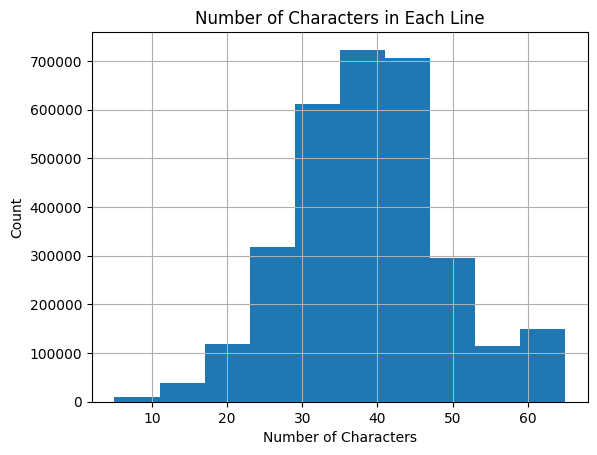

In [22]:
# number of characters in each Line with stopwords and punctuation
df['line'].str.len().hist()
plt.title("Number of Characters in Each Line")
plt.ylabel("Count")
plt.xlabel("Number of Characters")

Looking at this graph, you can see that most lines are around 40 characters with a maximum of around 65 and a minimum of around 5.  

I also wanted to look at the number of characters without stopwords or punctuation. 

Text(0.5, 0, 'Number of Characters')

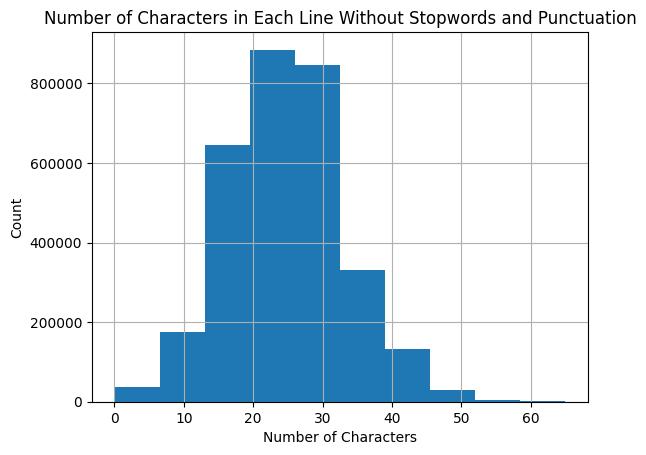

In [23]:
# number of characters in each Line without stopwords and punctuation
df['line1'].str.len().hist()
plt.title("Number of Characters in Each Line Without Stopwords and Punctuation")
plt.ylabel("Count")
plt.xlabel("Number of Characters")

Without the stopwords and punctuation, it looks like the number of characters was reduced by around 25.  



Next, I looked at the number of words in each line.

Text(0, 0.5, 'Count')

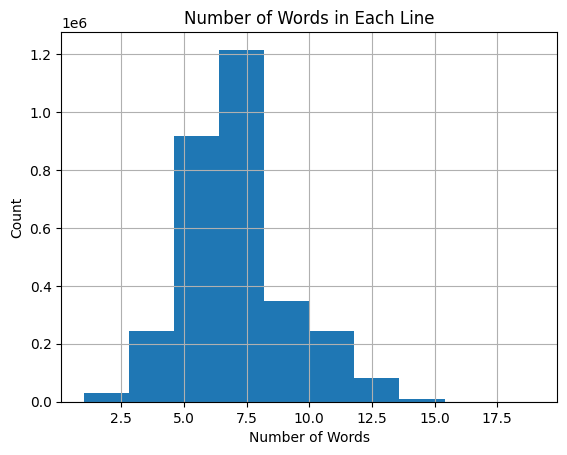

In [24]:
# number of words appearing in each line with stopwords
df['line'].str.split().map(lambda x: len(x)).hist()
plt.title("Number of Words in Each Line")
plt.xlabel('Number of Words')
plt.ylabel("Count")

This graph shows that the number of words in each line seems to be in the 5 to 8 words range with the maximum number close to 15.  

I also looked at the average word length for each line. 

Text(0, 0.5, 'Count')

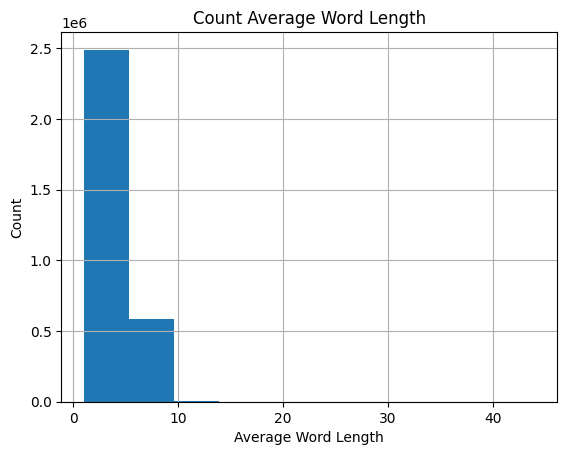

In [25]:
# average word length
df['line'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.title("Count Average Word Length")
plt.xlabel("Average Word Length")
plt.ylabel("Count")

Nearly all of the average word lengths are less than 10 with most looking like they are less than 5.




Next I looked at the occurrence of stopwords in the lines.

Text(0, 0.5, 'Count')

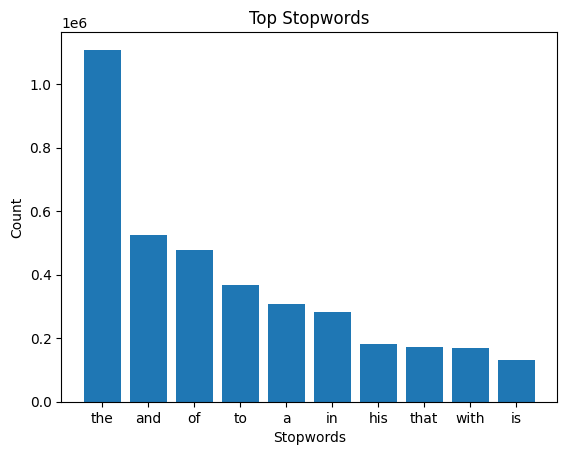

In [27]:
# top stopwords
stop = set(stopwords.words('english'))

corpus = []
text = df['line'].str.split()
text = text.values.tolist()
corpus = [word for i in text for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)
plt.title("Top Stopwords")
plt.xlabel("Stopwords")
plt.ylabel("Count")

You can see that the top stopword is the, however more importantly there seems to be a lot of stopwords in the data so they should be removed when creating models.  

I also looked at the most frequently occurring non-stopwords in the lines.

Text(0.5, 0, 'Count')

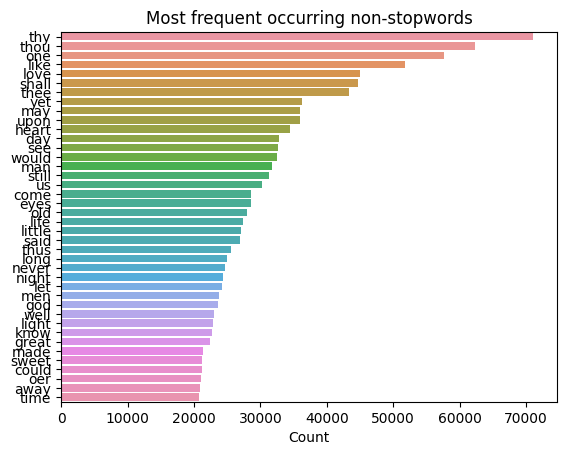

In [28]:
# Most frequent occuring non-stopwords

corpus = []
text = df['line1'].str.split()
text = text.values.tolist()
corpus = [word for i in text for word in i]

counter = Counter(corpus)
most = counter.most_common()
x, y=[], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
            
sns.barplot(x=y,y=x)
plt.title("Most frequent occurring non-stopwords")
plt.xlabel("Count")

### Ngram Exploration

I also did some Ngram exploration. Specifically, I looked at the most frequent bigrams and trigrams. 

In [29]:
# ngram graphing function
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    plt.xlabel("Count")


Text(0.5, 1.0, 'Top Bigrams with Stopwords')

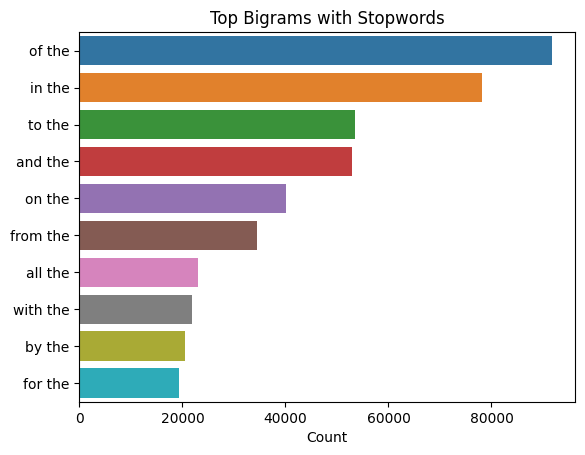

In [30]:
# top bigrams with stopwords
plot_top_ngrams_barchart(df['line'], 2)
plt.title("Top Bigrams with Stopwords")

These bigrams with Stopwords don't seem very useful.

I also looked at bigrams without stopwords.

Text(0.5, 1.0, 'Top Bigrams without Stopwords')

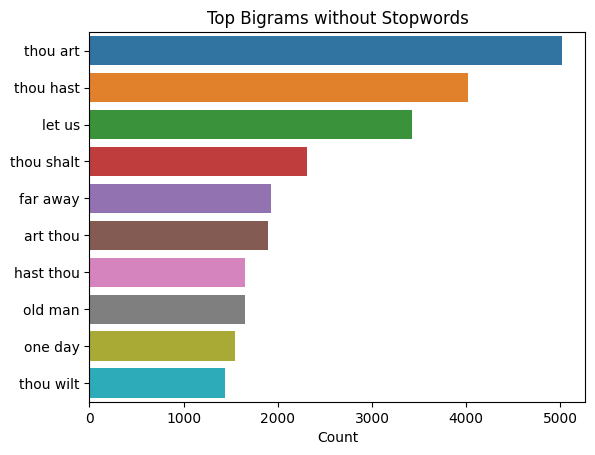

In [31]:
# top bigrams without stopwords
plot_top_ngrams_barchart(df['line1'], 2)
plt.title("Top Bigrams without Stopwords")


I also looked at the top trigrams.

Text(0.5, 1.0, 'Top Trigrams with stopwords')

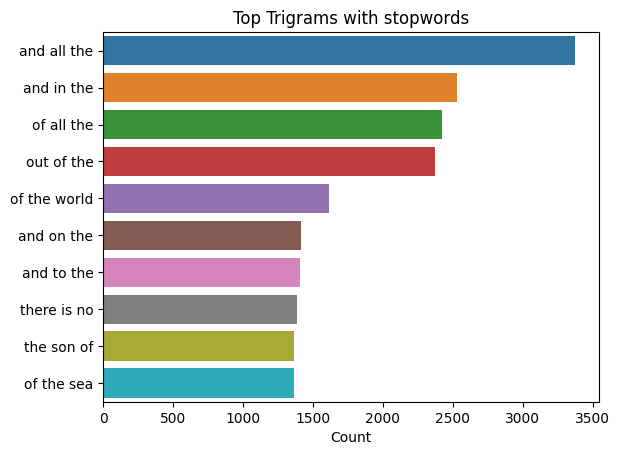

In [33]:
# top trigrams with stopwords
plot_top_ngrams_barchart(df['line'], 3)
plt.title("Top Trigrams with stopwords")

Text(0.5, 1.0, 'Top Trigrams without Stopwords')

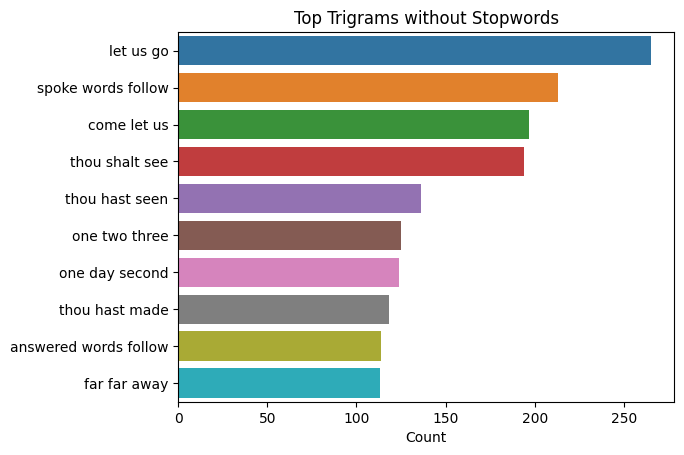

In [34]:
# top trigrams without stopwords
plot_top_ngrams_barchart(df['line1'], 3)
plt.title("Top Trigrams without Stopwords")

### Wordcloud

I also created a word cloud of lines. This word cloud did involve lemmatization and removing stopwords. 

In [35]:
# make a word cloud
def plot_wordcloud(text):
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for df in text:
            words=[w for w in word_tokenize(df) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

Here's the wordcloud for all lines.

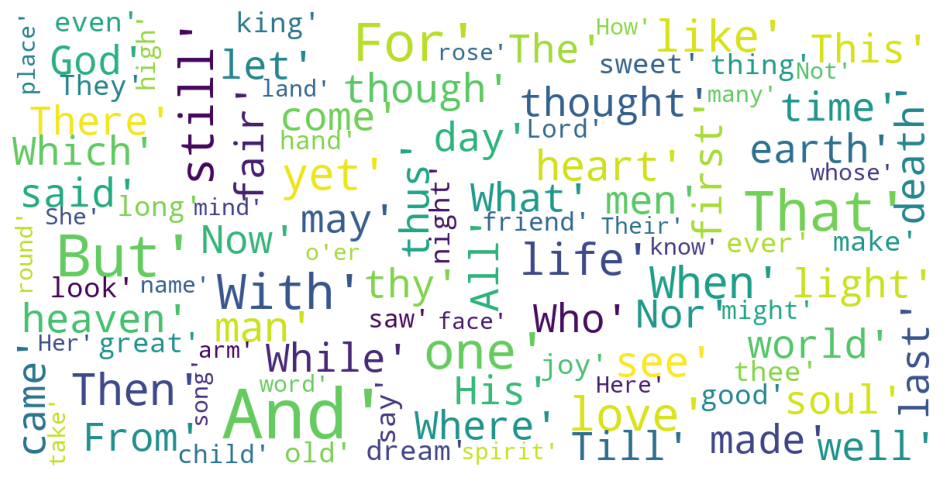

In [36]:
# wordcloud for all lines
plot_wordcloud(df['line'])

### Parts of Speech Tagging NOTE: THIS SECTION IS NOT WORKING!

Next, I did some parts of speech tagging and looked at the most frequent parts of speech used in the lines.

In [44]:
# graph Parts of Speech

#nltk.download('averaged_perceptron_tagger')
def plot_parts_of_speech_barchart(text):

    def _get_pos(text):
        pos=nltk.pos_tag(word_tokenize(text))
        pos=list(map(list,zip(*pos)))[1]
        return pos
    
    tags=text.apply(lambda x : _get_pos(x))
    tags=[x for l in tags for x in l]
    counter=Counter(tags)
    x,y=list(map(list,zip(*counter.most_common(7))))
    
    sns.barplot(x=y,y=x)
    plt.xlabel("Count")

In [ ]:
plot_parts_of_speech_barchart(df['line1'])
plt.title("Top Parts of Speech without stopwords")



I also wanted to look at which nouns and adjectvies were the most common.

In [46]:
# graph the most common POS 
def plot_most_common_part_of_speech_barchart(text, part_of_speech='NN'):  

    def _filter_pos(text):
        pos_type=[]
        pos=nltk.pos_tag(word_tokenize(text))
        for word,tag in pos:
            if tag==part_of_speech:
                pos_type.append(word)
        return pos_type


    words=text.apply(lambda x : _filter_pos(x))
    words=[x for l in words for x in l]
    counter=Counter(words)
    x,y=list(map(list,zip(*counter.most_common(7))))
    sns.barplot(x=y,y=x).set_title(part_of_speech)
    plt.xlabel("Count")

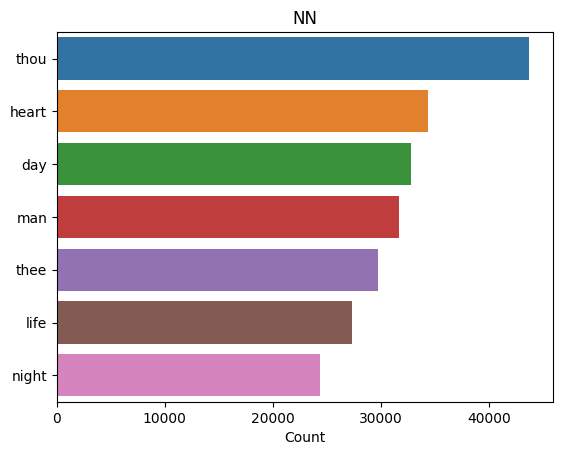

In [47]:
# most common nouns
plot_most_common_part_of_speech_barchart(df['line1'])

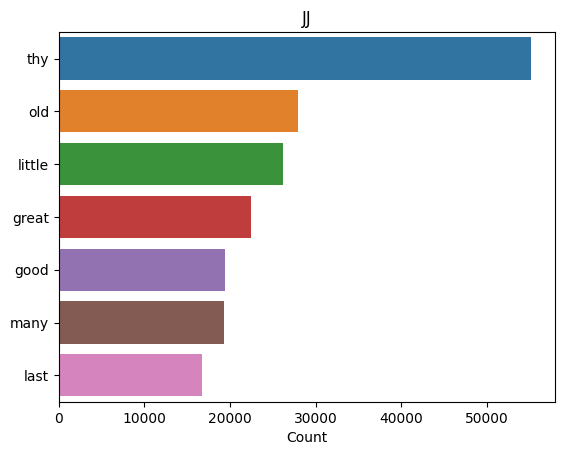

In [49]:
# most common adjective
plot_most_common_part_of_speech_barchart(df['line1'], part_of_speech="JJ")

### Text Complexity 

Next, I looked at the text complexity of the lines using Flesch Reading Ease (FRE).

Text(0, 0.5, 'Count')

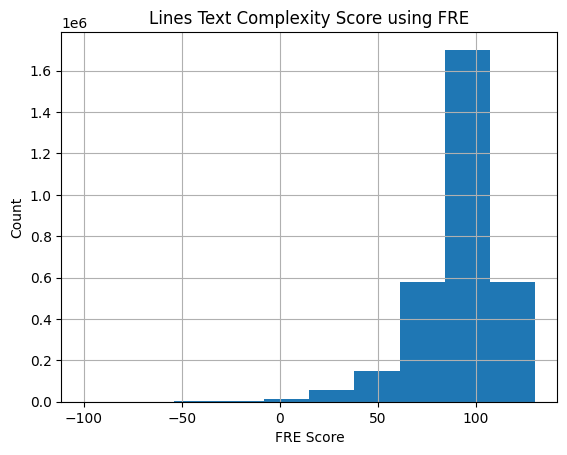

In [50]:
# graph text complexity using Flesch Reading Ease (FRE)
df['line'].apply(lambda x : flesch_reading_ease(x)).hist(range=[-100, 130])
plt.title("Lines Text Complexity Score using FRE")
plt.xlabel("FRE Score")
plt.ylabel("Count")

Flesch Reading Ease Interpretation:  
– 0-30 College  
– 50-60 High school  
– 60+ Fourth grade

Interestingly most of these lines of poetry don't seem to rank as very complex.  